Seemed like we could deal with extra capacity in our network, so these are the results of adding extra MLP layers.

Loading the pickle
======

In [1]:
import pylearn2.utils
import pylearn2.config
import theano
import neukrill_net.dense_dataset
import neukrill_net.utils
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import holoviews as hl
%load_ext holoviews.ipython
import sklearn.metrics

Using gpu device 0: Tesla K40c
:0: FutureWarning: IPython widgets are experimental and may change in the future.


Welcome to the HoloViews IPython extension! (http://ioam.github.io/holoviews/)
Available magics: %compositor, %opts, %params, %view, %%labels, %%opts, %%view


In [2]:
cd ..

/afs/inf.ed.ac.uk/user/s08/s0805516/repos/neukrill-net-work


In [3]:
settings = neukrill_net.utils.Settings("settings.json")
run_settings = neukrill_net.utils.load_run_settings(
    "run_settings/alexnet_based_norm_global_8aug_pmlp1.json", settings, force=True)

In [4]:
model = pylearn2.utils.serial.load(run_settings['alt_picklepath'])

In [25]:
def plot_monitor(model,c = 'valid_y_nll'):
    channel = model.monitor.channels[c]
    plt.title(c)
    plt.grid(which="both")
    plt.plot(channel.example_record,channel.val_record)
    return None

Adding one MLP layer
======

The following are the final logs from the best pickle file saved.

In [21]:
%run ~/repos/pylearn2/pylearn2/scripts/print_monitor.py /disk/scratch/neuroglycerin/models/alexnet_based_norm_global_8aug_pmlp1.pkl

epochs seen:  71
time trained:  37644.5284109
learning_rate : 0.00224997522309
momentum : 0.949993252754
total_seconds_last_epoch : 522.805847168
train_h1_kernel_norms_max : 1.93652689457
train_h1_kernel_norms_mean : 1.36644768715
train_h1_kernel_norms_min : 0.326520323753
train_h1_max_x_max_u : 18.449005127
train_h1_max_x_mean_u : 3.6366121769
train_h1_max_x_min_u : 0.0116694038734
train_h1_mean_x_max_u : 5.55913305283
train_h1_mean_x_mean_u : 0.522442698479
train_h1_mean_x_min_u : 0.00111842481419
train_h1_min_x_max_u : 1.76048529148
train_h1_min_x_mean_u : 0.0201795827597
train_h1_min_x_min_u : 0.0
train_h1_range_x_max_u : 18.409778595
train_h1_range_x_mean_u : 3.61643624306
train_h1_range_x_min_u : 0.0116694038734
train_h2_kernel_norms_max : 1.93652689457
train_h2_kernel_norms_mean : 1.90194439888
train_h2_kernel_norms_min : 1.24234855175
train_h2_max_x_max_u : 30.162984848
train_h2_max_x_mean_u : 5.85832595825
train_h2_max_x_min_u : 0.0
train_h2_mean_x_max_u : 7.68249702454
train_

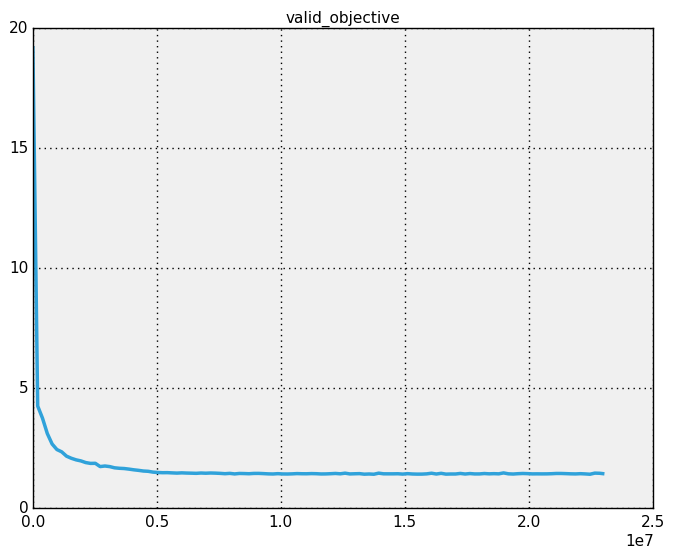

In [19]:
plot_monitor(model,c="valid_objective")

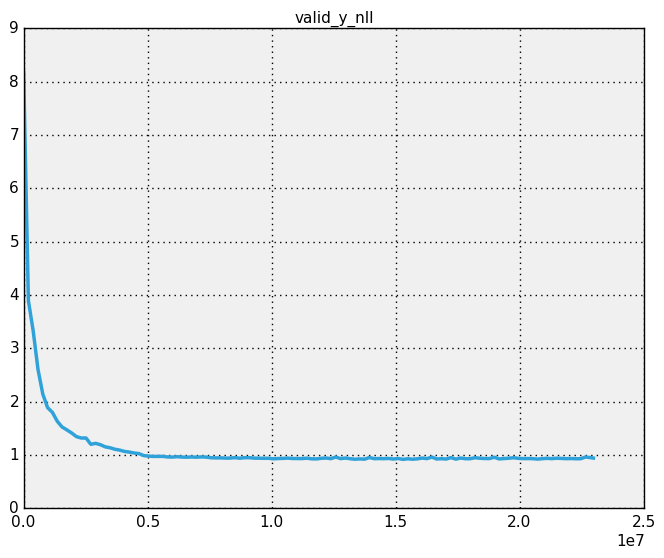

In [20]:
plot_monitor(model,c="valid_y_nll")

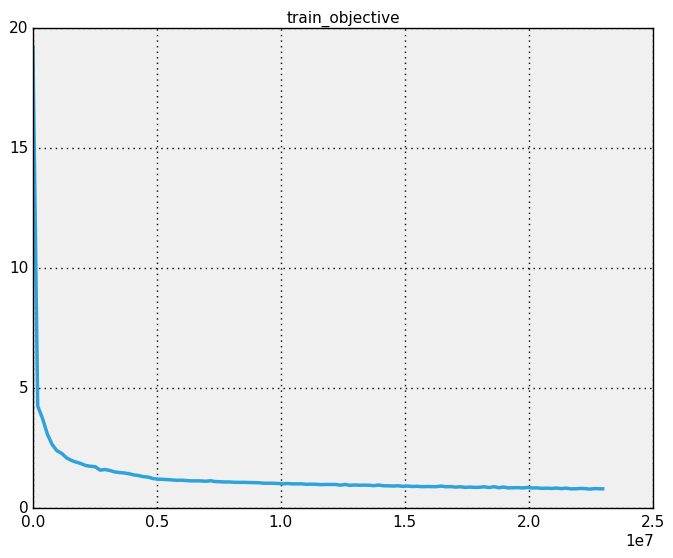

In [22]:
plot_monitor(model,c="train_objective")

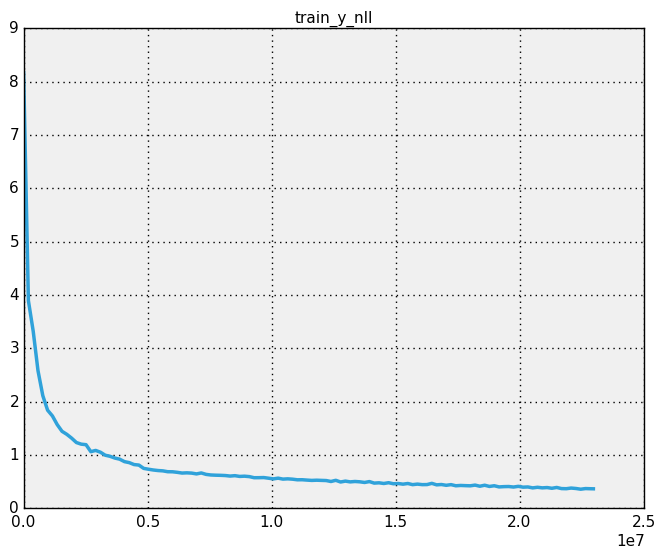

In [23]:
plot_monitor(model,c="train_y_nll")

A bit of overfitting happening here, but is it more than normal. Looking at the network _before_ adding that layer:

In [29]:
run_settings = neukrill_net.utils.load_run_settings(
    "run_settings/alexnet_based_norm_global_8aug.json", settings, force=True)
old = pylearn2.utils.serial.load(run_settings['pickle abspath'])

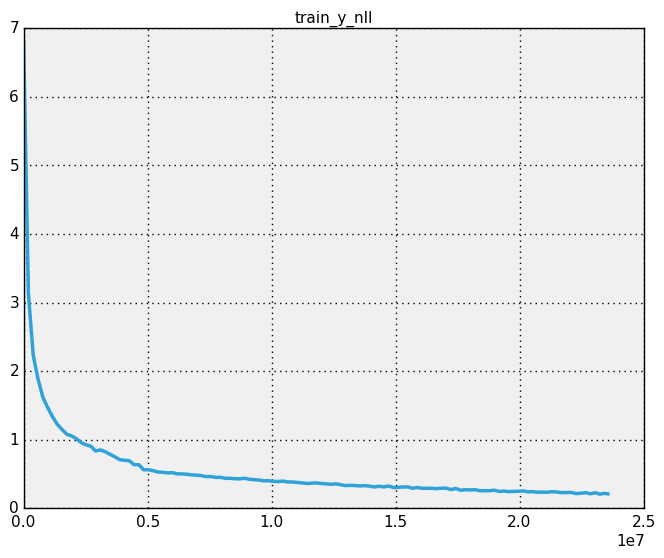

In [30]:
plot_monitor(old,c="train_y_nll")

It drops faster and ends lower than without the MLP layer. Suspect whatever is happening here, the extra MLP layer is not having much of an effect.

Two More MLP Layers
=======

Also ran a model adding two more MLP layers, tracking the results of this model:

In [31]:
run_settings = neukrill_net.utils.load_run_settings(
    "run_settings/alexnet_based_norm_global_8aug_pmlp2.json", settings, force=True)
twomlp = pylearn2.utils.serial.load(run_settings['alt_picklepath'])

In [32]:
%run ~/repos/pylearn2/pylearn2/scripts/print_monitor.py /disk/scratch/neuroglycerin/models/alexnet_based_norm_global_8aug_pmlp2.pkl

epochs seen:  108
time trained:  58310.8673749
learning_rate : 0.00224997522309
momentum : 0.949993252754
total_seconds_last_epoch : 523.871337891
train_h1_kernel_norms_max : 1.93652689457
train_h1_kernel_norms_mean : 1.24108326435
train_h1_kernel_norms_min : 0.346896827221
train_h1_max_x_max_u : 15.597278595
train_h1_max_x_mean_u : 3.01797914505
train_h1_max_x_min_u : 0.0175006352365
train_h1_mean_x_max_u : 4.5201010704
train_h1_mean_x_mean_u : 0.535802602768
train_h1_mean_x_min_u : 0.000964893319178
train_h1_min_x_max_u : 1.3846373558
train_h1_min_x_mean_u : 0.0361537821591
train_h1_min_x_min_u : 0.0
train_h1_range_x_max_u : 15.5755462646
train_h1_range_x_mean_u : 2.98182249069
train_h1_range_x_min_u : 0.0174981094897
train_h2_kernel_norms_max : 1.93652689457
train_h2_kernel_norms_mean : 1.91939425468
train_h2_kernel_norms_min : 1.43268847466
train_h2_max_x_max_u : 24.1306877136
train_h2_max_x_mean_u : 4.23142004013
train_h2_max_x_min_u : 0.0
train_h2_mean_x_max_u : 5.55021238327
tra

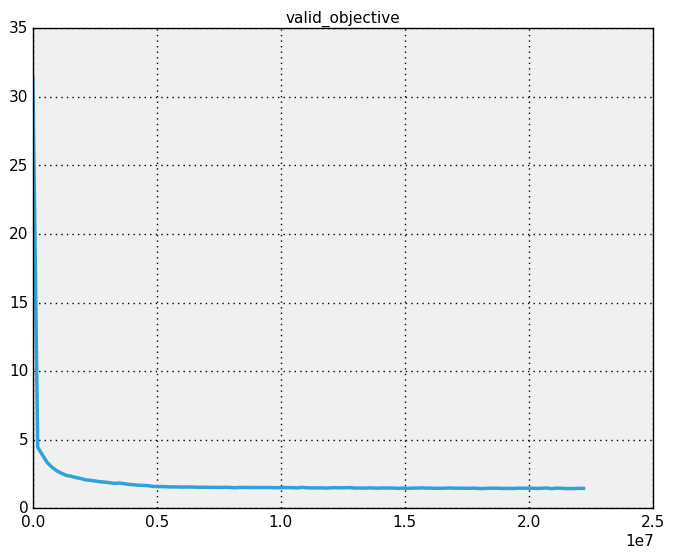

In [33]:
plot_monitor(twomlp, c="valid_objective")

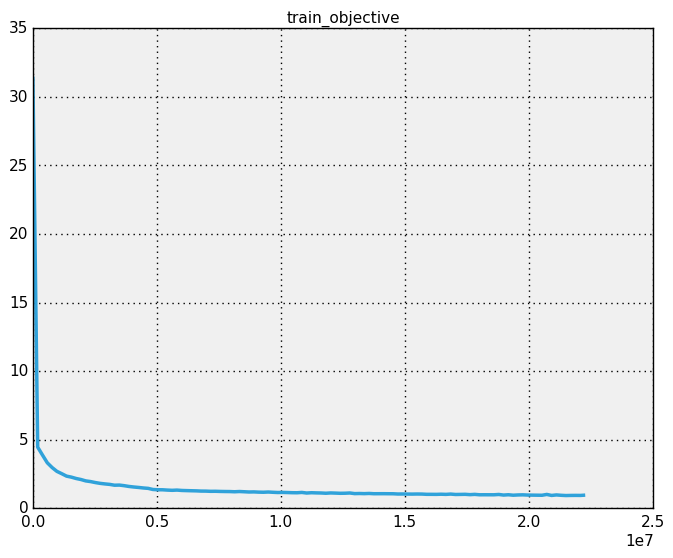

In [34]:
plot_monitor(twomlp, c="train_objective")

Seems to be very similar to the last one. Unsure what effect adding the extra MLP layer has actually had.